# TASK 1

**What are the advantages of convolutional layers over fully connected layers in image processing tasks?**


Convolutional layers are better suited for image processing because they efficiently capture spatial hierarchies, use fewer parameters through weighted kernels, and provide translation invariance. This allows the model to recognize features across different positions in the image, making it more computationally efficient and better at generalizing compared to fully connected layers.

**How does pooling help in reducing the computational complexity of a CNN?**

Pooling reduces computational complexity in CNNs by downsampling feature maps, leading to fewer operations and lower memory usage, while also making the model more robust to slight input variations.

**Compare different types of pooling layers (max pooling, average pooling). What are their respective advantages and disadvantages?**


*Max pooling* selects the maximum value from each region of the feature map, emphasizing the most prominent features and providing robustness to noise. However, it can lose fine details. \
*Average pooling*, on the other hand, computes the average value of each region, preserving more information and providing smoother outputs, but it may blur important features. \
Max pooling is generally better for tasks requiring strong feature detection, while average pooling is useful when preserving contextual information is important

# TASK 2


## MNIST DATASET

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 1. Load and Preprocess MNIST Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape for CNN input (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. Define CNN Architecture
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D((2, 2)))

# Added Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Increased Dropout rate
model.add(Dense(64, activation='relu'))  # Added an additional Dense layer
model.add(Dense(10, activation='softmax'))

# 3. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# 6. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 7. Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,474 (462.79 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1448/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8642 - loss: 0.4174

## Cat-Dog dataset


Since my laptop kept crashing so I had to delete some images from dataset leaving 10,000 images to work on. 😭

In [2]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to check and remove corrupted images
def check_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            try:
                img = Image.open(os.path.join(directory, filename))
                img.verify()
            except (IOError, SyntaxError) as e:
                print(f"Corrupted image: {filename}")
                os.remove(os.path.join(directory, filename))

# Check for corrupted images in the Cat and Dog directories
check_images('C:\\Users\\PMLS\\Desktop\\BWT\\BWT-ML-DL-Track\\Week 9\\PetImages\\Cat')
check_images('C:\\Users\\PMLS\\Desktop\\BWT\\BWT-ML-DL-Track\\Week 9\\PetImages\\Dog')

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% validation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\PMLS\\Desktop\\BWT\\BWT-ML-DL-Track\\Week 9\\PetImages\\',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Use subset for splitting data
    shuffle=True,
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\PMLS\\Desktop\\BWT\\BWT-ML-DL-Track\\Week 9\\PetImages\\',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Use subset for splitting data
    shuffle=True,
    seed=42
)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # You can adjust the number of epochs
)

# Save the model
model.save('cat_dog_classifier2.h5')


Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 555ms/step - accuracy: 0.5287 - loss: 0.7188 - val_accuracy: 0.6658 - val_loss: 0.6153
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.7586
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 565ms/step - accuracy: 0.6666 - loss: 0.5957 - val_accuracy: 0.7379 - val_loss: 0.5329
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.4316
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 682ms/step - accuracy: 0.7422 - loss: 0.5195 - val_accuracy: 0.7182 - val_loss: 0.5404
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5038
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 155s 618ms/step - accuracy: 0.7931 - loss: 0.4399 - val_accuracy: 

In [8]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('cat_dog_classifier2.h5')

# Get the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,179 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

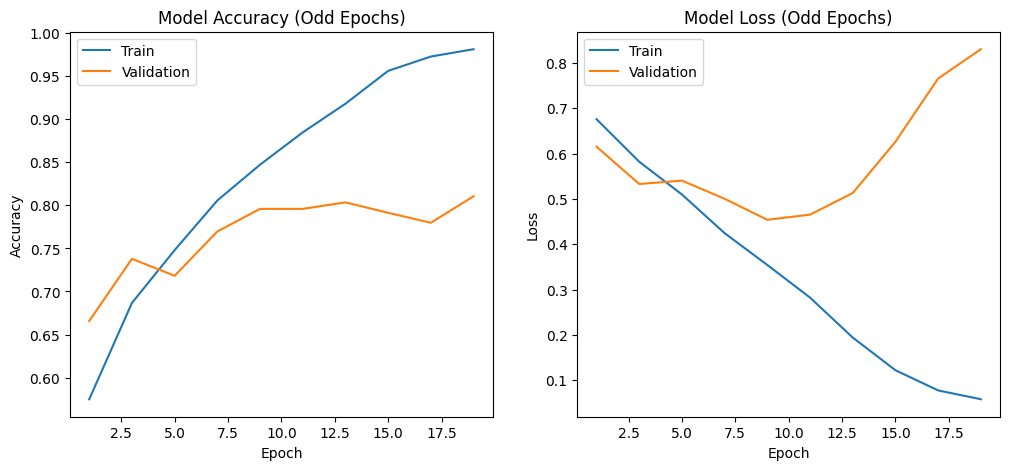

In [7]:
import matplotlib.pyplot as plt

# Extract values for odd epochs
odd_epochs = range(1, len(history.history['accuracy']) + 1, 2)
train_accuracy_odd = [history.history['accuracy'][i-1] for i in odd_epochs]
val_accuracy_odd = [history.history['val_accuracy'][i-1] for i in odd_epochs]
train_loss_odd = [history.history['loss'][i-1] for i in odd_epochs]
val_loss_odd = [history.history['val_loss'][i-1] for i in odd_epochs]

# Plot training & validation accuracy values for odd epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(odd_epochs, train_accuracy_odd)
plt.plot(odd_epochs, val_accuracy_odd)
plt.title('Model Accuracy (Odd Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for odd epochs
plt.subplot(1, 2, 2)
plt.plot(odd_epochs, train_loss_odd)
plt.plot(odd_epochs, val_loss_odd)
plt.title('Model Loss (Odd Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
